# Intro to Data Science 
# Week 5 - Regression 

This week we are interested in **relationships between variables**

## Overview

We'll look at 

* Correlation 

* Simple Linear Models (Bivariate)

    * Fitting
    
    * Interpretting 
    
    * Evaluating 
    
* Multiple Linear Models (Multivariate)    

    * Fitting
    
    * Interpretting
    
    * Using for predictions
    
* Polynomial Models
    

In [882]:
import pandas as pd
import numpy as np
#Show max 100 columns or rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#Dont use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)

## The Dataset 

The Electronic Frontier Foundation has collected a dataset called the [Atlas of Surveillance](https://atlasofsurveillance.org/). The Atlas of Surveillance is a database of surveillance technologies deployed by law enforcement in communities across the United States. 

This includes drones, body-worn cameras, automated license plate readers, facial recognition, and more.

I'm curious if any states are utilising this technology **more than others** and **why** this might be. 

In this lecture we'll see how we might go about using some data science methods to approach this topic. 

In [883]:
#Load in the CSV
df = pd.read_csv("data/LPL 2018 Summer Playoffs - Player Stats - OraclesElixir.csv")
df

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,KP,KS%,DTH%,FB%,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,CWPM,WCPM
0,Able,Royal Never Give Up,ADC,3,33%,100%,9,9,12,2.30000,63.6%,27.3%,23.7%,33%,-191,-57,-10.70000,10.00000,32.6%,514,31.6%,NaN,272,27.0%,NaN,0.20000,0.03000,0.54000
1,Alex,FunPlus Phoenix,Jungle,3,33%,67%,4,7,16,2.90000,80.0%,16.0%,25.0%,33%,-270,-460,-7.00000,5.00000,12.1%,145,11.8%,NaN,180,17.4%,NaN,0.41000,0.36000,0.60000
2,Angel,Suning,Middle,4,50%,50%,14,8,15,3.60000,59.2%,28.6%,19.0%,50%,-237,-248,-10.00000,8.40000,23.9%,394,20.7%,NaN,246,21.8%,NaN,0.80000,0.52000,0.23000
3,Baolan,Invictus Gaming,Support,10,50%,50%,11,30,90,3.40000,71.1%,7.7%,20.0%,10%,-70,-98,3.60000,1.80000,5.9%,158,7.7%,NaN,123,10.3%,NaN,1.67000,0.67000,0.22000
4,Cat,Top Esports,Support,8,38%,100%,5,25,34,1.60000,54.9%,7.0%,22.9%,0%,-64,-71,4.90000,1.90000,7.2%,142,9.6%,NaN,101,9.7%,NaN,1.36000,0.40000,0.38000
5,Clearlove,EDward Gaming,Jungle,2,0%,0%,3,3,4,2.30000,58.3%,25.0%,12.5%,100%,121,-66,1.50000,4.40000,9.0%,155,11.7%,NaN,144,15.5%,NaN,0.52000,0.44000,0.43000
6,Clid,JD Gaming,Jungle,15,67%,53%,27,33,84,3.40000,65.7%,16.0%,23.1%,27%,-5,76,0.00000,4.80000,12.7%,254,14.6%,NaN,186,16.7%,NaN,0.59000,0.35000,0.40000
7,Cool,FunPlus Phoenix,Middle,3,33%,67%,7,8,15,2.80000,88.0%,28.0%,28.6%,67%,-296,-38,-9.00000,8.30000,24.6%,262,20.2%,NaN,229,22.3%,NaN,0.35000,0.18000,0.16000
8,Corn,Top Esports,Middle,8,38%,50%,30,21,20,2.40000,70.4%,42.3%,19.3%,25%,53,115,5.30000,9.30000,26.3%,416,25.8%,NaN,265,25.8%,NaN,0.48000,0.16000,0.12000
9,Crisp,FunPlus Phoenix,Support,3,33%,33%,4,5,17,4.20000,84.0%,16.0%,17.9%,33%,-99,-20,1.70000,1.80000,5.6%,129,10.5%,NaN,105,10.4%,NaN,1.77000,0.59000,0.23000


## Definitions
Pos:position the player plays
GP:Games Played
W%:Win rate
CTR%:Counter-pick rate: percentage of games in which this player/champion was picked after their lane opponent (not always available)
K/D/A:	Total Kill/Death/Assist ratio
KP:	Kill participation: percentage of team's kills in which player earned a Kill or Assist
KS%:Kill share: player's percentage of their team's total kills
DTH%:Average share of team’s deaths	
FB%:First Blood rate -- for players/champions, percent of games earning a First Blood participation (kill or assist)
GD10:Average gold difference at 10 minutes	
XPD10:	Average experience difference at 10 minutesCSD10	
CSPM:Average monsters + minions killed per minute
CS%P15:	Average share of team's total CS post-15-minutes
CSD:Average creep score difference at 10 minutes
CSPM:Average monsters + minions killed per minute
CS%P15:	Average share of team's total CS post-15-minutes
DPM:	Average damage to champions per minute
EGPM:Average earned gold per minute (excludes starting gold and inherent gold generation)
GOLD%:Gold Share: average share of team’s total gold earned (excludes starting gold and inherent gold generation)
WPM:Average wards placed per minute
CWPM:Control wards purchased per minute
WCPM:Average wards cleared per minute



In [884]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_scaled = df.drop("Team", axis = 1)


In [885]:
# scale the data
# List containing all column names to be converted
columns_to_convert = ['W%', 'CTR%', 'CS%P15', 'DMG%', 'GOLD%', 'KS%', 'DTH%', 'FB%', 'KP']

for column in columns_to_convert:
    # Remove the percentage sign at the end of the string, convert to float, and then divide by 100.0
    x_scaled[column] = x_scaled[column].str.replace('%', '').astype(float) / 100.0

In [886]:
x_scaled

,Player,Pos,GP,W%,CTR%,K,D,A,KDA,KP,KS%,DTH%,FB%,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,CWPM,WCPM
0,Able,ADC,3,0.33000,1.00000,9,9,12,2.30000,0.63600,0.27300,0.23700,0.33000,-191,-57,-10.70000,10.00000,0.32600,514,0.31600,NaN,272,0.27000,NaN,0.20000,0.03000,0.54000
1,Alex,Jungle,3,0.33000,0.67000,4,7,16,2.90000,0.80000,0.16000,0.25000,0.33000,-270,-460,-7.00000,5.00000,0.12100,145,0.11800,NaN,180,0.17400,NaN,0.41000,0.36000,0.60000
2,Angel,Middle,4,0.50000,0.50000,14,8,15,3.60000,0.59200,0.28600,0.19000,0.50000,-237,-248,-10.00000,8.40000,0.23900,394,0.20700,NaN,246,0.21800,NaN,0.80000,0.52000,0.23000
3,Baolan,Support,10,0.50000,0.50000,11,30,90,3.40000,0.71100,0.07700,0.20000,0.10000,-70,-98,3.60000,1.80000,0.05900,158,0.07700,NaN,123,0.10300,NaN,1.67000,0.67000,0.22000
4,Cat,Support,8,0.38000,1.00000,5,25,34,1.60000,0.54900,0.07000,0.22900,0.00000,-64,-71,4.90000,1.90000,0.07200,142,0.09600,NaN,101,0.09700,NaN,1.36000,0.40000,0.38000
5,Clearlove,Jungle,2,0.00000,0.00000,3,3,4,2.30000,0.58300,0.25000,0.12500,1.00000,121,-66,1.50000,4.40000,0.09000,155,0.11700,NaN,144,0.15500,NaN,0.52000,0.44000,0.43000
6,Clid,Jungle,15,0.67000,0.53000,27,33,84,3.40000,0.65700,0.16000,0.23100,0.27000,-5,76,0.00000,4.80000,0.12700,254,0.14600,NaN,186,0.16700,NaN,0.59000,0.35000,0.40000
7,Cool,Middle,3,0.33000,0.67000,7,8,15,2.80000,0.88000,0.28000,0.28600,0.67000,-296,-38,-9.00000,8.30000,0.24600,262,0.20200,NaN,229,0.22300,NaN,0.35000,0.18000,0.16000
8,Corn,Middle,8,0.38000,0.50000,30,21,20,2.40000,0.70400,0.42300,0.19300,0.25000,53,115,5.30000,9.30000,0.26300,416,0.25800,NaN,265,0.25800,NaN,0.48000,0.16000,0.12000
9,Crisp,Support,3,0.33000,0.33000,4,5,17,4.20000,0.84000,0.16000,0.17900,0.33000,-99,-20,1.70000,1.80000,0.05600,129,0.10500,NaN,105,0.10400,NaN,1.77000,0.59000,0.23000


In [887]:
#Clean dataset
x_scaled = x_scaled[x_scaled['GP'] > 3]


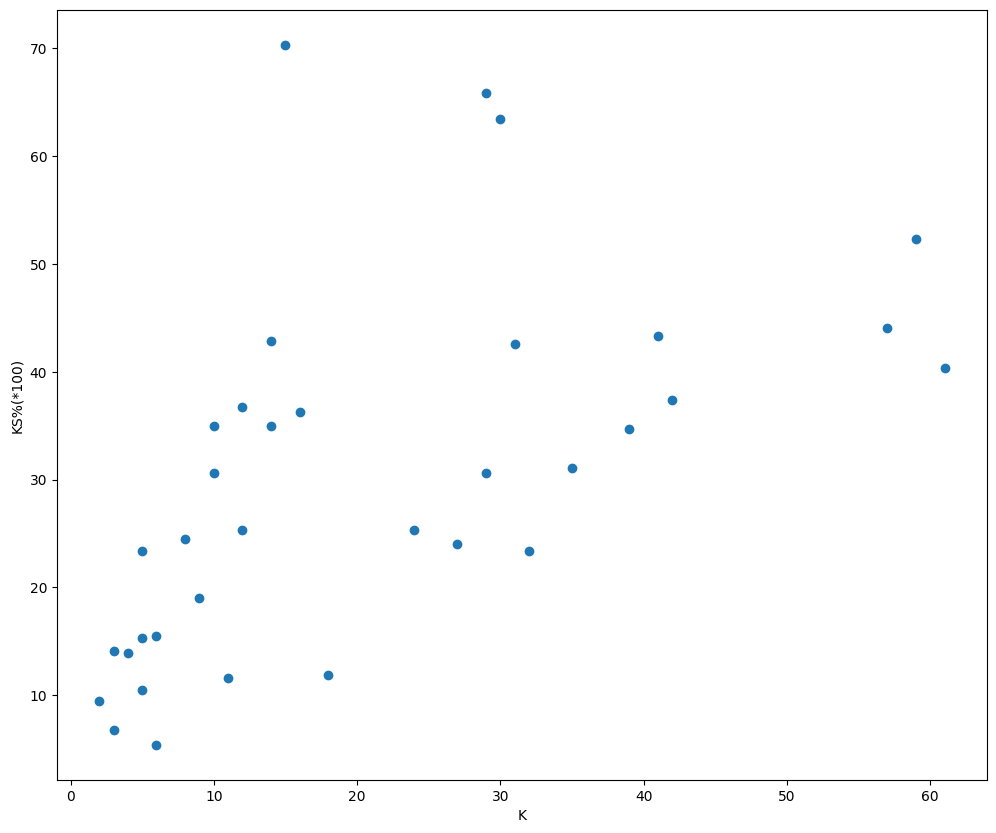

In [888]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

# data = df[["W%","KDA"]].values
data = x_scaled[["KS%","K"]].values


x = data[:,1]
y = data[:,0]*150

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,10))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax

ax = plot_scatter(x,y,"K","KS%(*100)")

In [889]:
#Correlate
from scipy import stats
r, p = stats.pearsonr(x,y)
r

0.5717199283278659

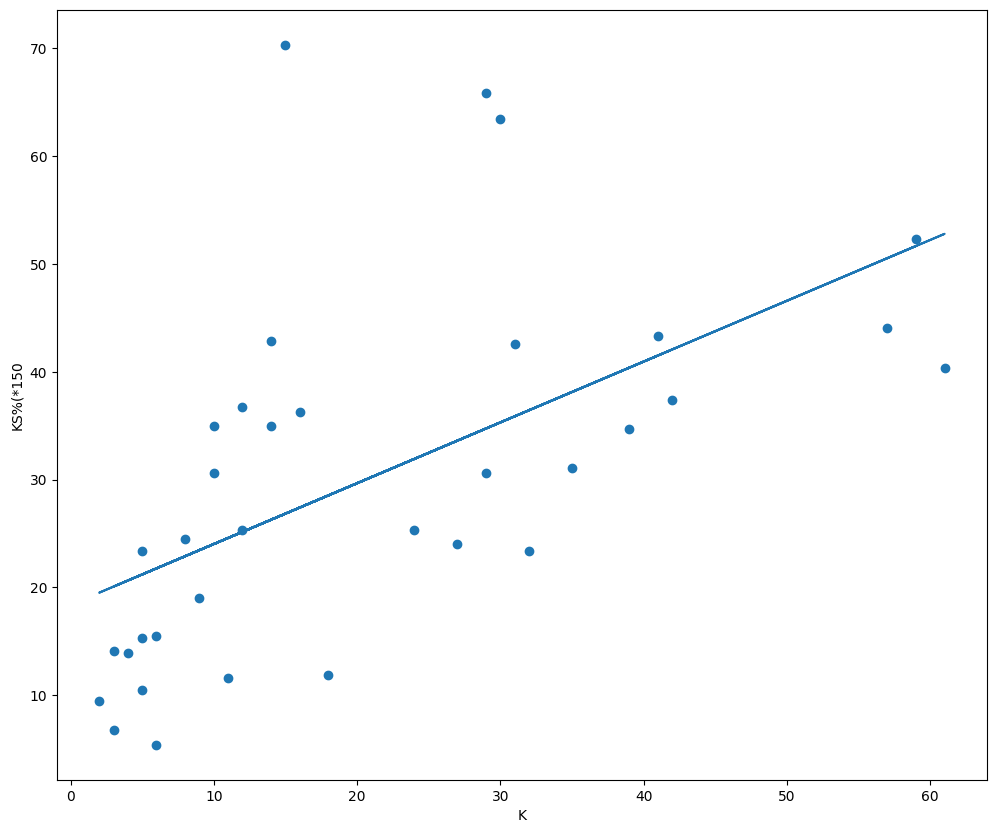

In [890]:
x = data[:,1]
y = data[:,0]*150
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"K","KS%(*150")
ax.plot(x, model_y)

In [891]:
#Interpret our police model
slope, intercept

(0.5643605, 18.377228021053007)

In [892]:
#a good fit? Also known as the Coefficient of determination
r2=r*r
r2

0.32686367644722025

### p-value

We also get a **p-value** returned by our model, and we know that this is result of a **hypothesis test**. 

The hypothesis we are looking to test is that there is a non-zero slope for this model, making the **null hypothesis** that **the slope is 0**. A **p-value** of less than 0.05 allows us the **reject the null hypothesis** and conclude there is a relationship between the two variables

Our low p-value allows to conclude this is in fact the case for **Surveillance** and **Population**.

In [893]:
p

0.00033357521826439095

### Which states don't fit the model, .annotate()

We can see our **r <sup>2<sup>** close to 1 means that our model is a good fit. 

We can also see that some of the states deviate quite signficantly from the general trend, pointing towards that these states perhaps use more or less surveillance than one would expect from a state that size.
    
In order to see which states to investigate further, we can take the **state codes** and use the ``.annotate()`` function in ``pyplot`` to add in some labels
    

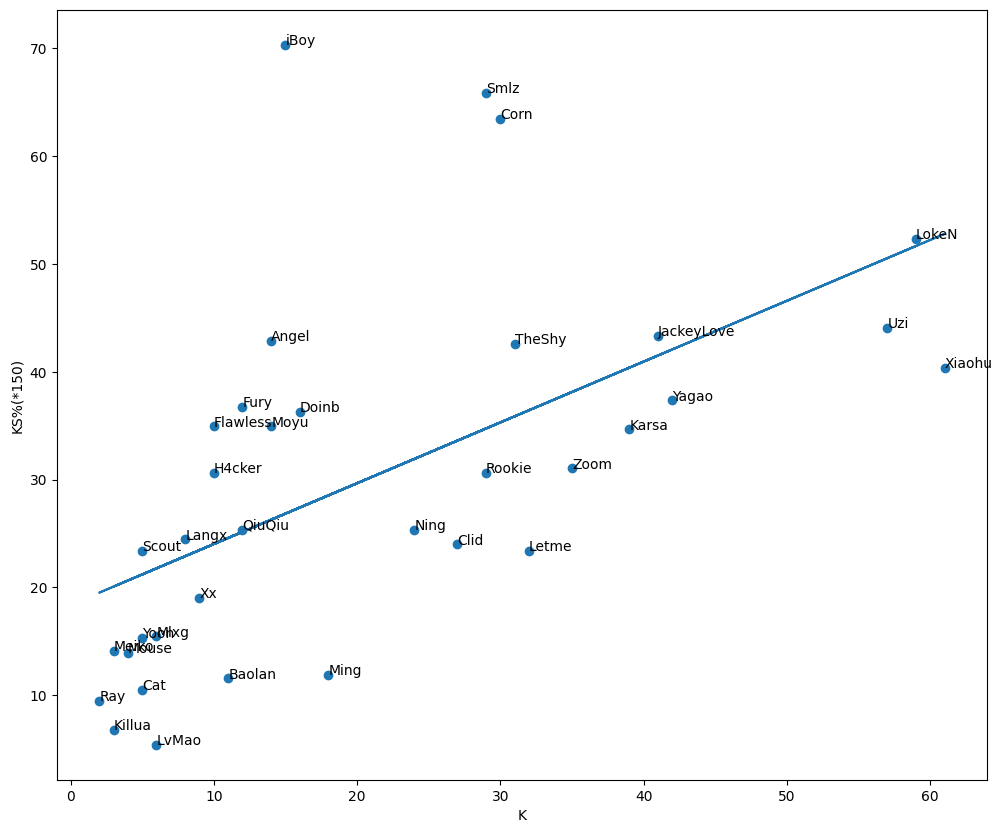

In [894]:

def plot_scatter(x, y, xlabel, ylabel, annotations=None):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.scatter(x, y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    if annotations is not None:
        for i, label in enumerate(annotations):
            ax.annotate(label, (x[i], y[i]))
    return ax

ax = plot_scatter(x, y, "K", "KS%(*150)", annotations=x_scaled["Player"].values)
ax.plot(x, model_y)


In [895]:
jttu = x_scaled[x_scaled["Player"] == "iBoy"]
jttu_en = jttu["K"]/150
jttu_predicted = jttu_en * slope
jttu_ratio = jttu["KS%"]/jttu_predicted
jttu_ratio
#Player iBoy has 8.31 times what the model would predict

18   8.31029
dtype: float64

In [896]:
x_scaled["ratioToModel"] = x_scaled["KS%"]*150/((x_scaled["K"])*slope)
x_scaled.sort_values("ratioToModel", ascending = False)[["Player","ratioToModel"]]

/var/folders/1l/ygt81nk5749f3hs2_wj4msx00000gn/T/ipykernel_42320/63388883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_scaled["ratioToModel"] = x_scaled["KS%"]*150/((x_scaled["K"])*slope)


,Player,ratioToModel
36,Ray,8.37231
29,Meiko,8.32801
18,iBoy,8.31029
38,Scout,8.29257
12,Flawless,6.19285
32,Mouse,6.17956
2,Angel,5.42966
13,Fury,5.42650
45,Yoon,5.42207
15,H4cker,5.42207


## Violent Crime is not a good predictor

So **Population can explain most of the variation in our data**, but what other information could we bring in that might also account for the error that exists between some of the observations and the model?

Average crime budget? Percentage of Republican Senators? Average Income? Ethnic make up?

Our **FBI** stats also tell us about the violent crimes commited in each state. Perhaps the amount of crime will also be a good predictor of surveillance tech?


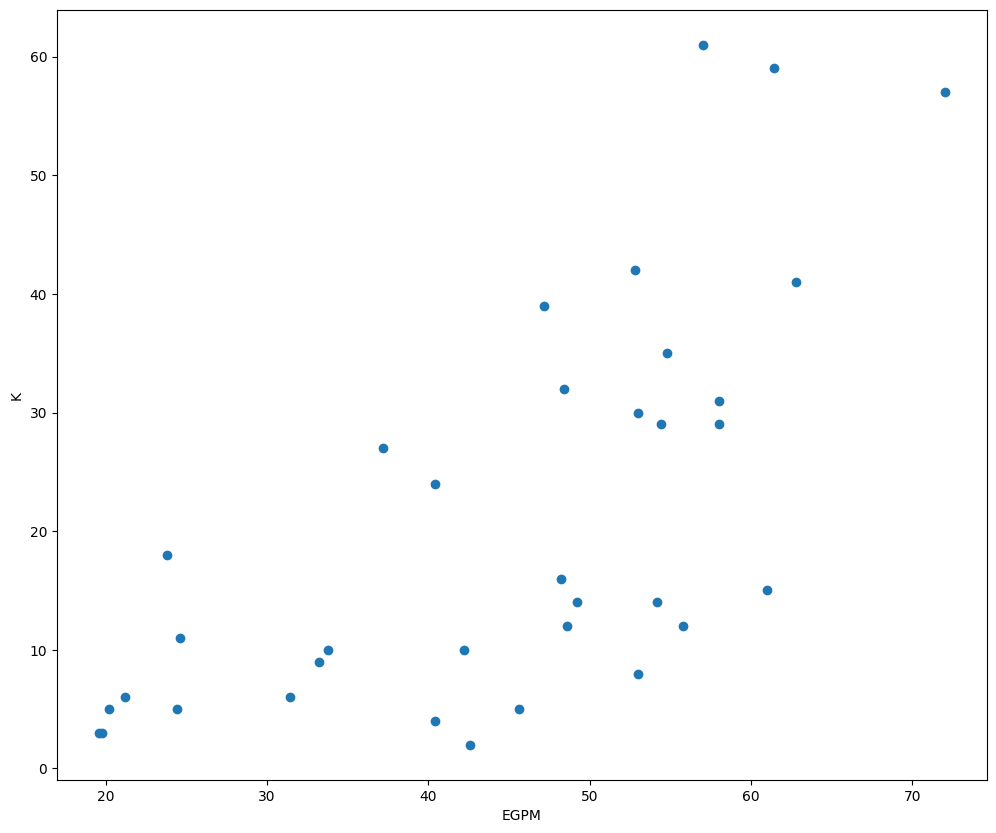

In [897]:
data = x_scaled[["EGPM","K"]].values
x = data[:,0]/5
y = data[:,1]
ax = plot_scatter(x,y,"EGPM","K")

(0.9201673, -53.52048909773123, 0.7921291407569532, 1.4377754422237271e-08)

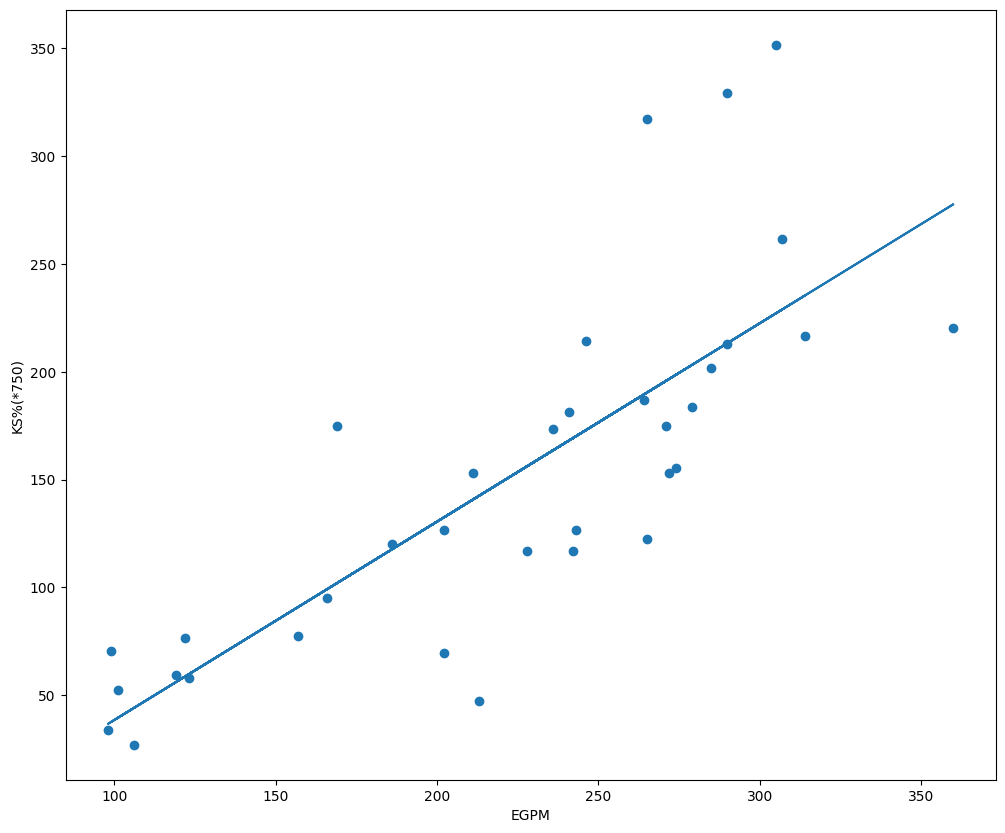

In [898]:
data = x_scaled[["EGPM","KS%"]].values
x = data[:,0]
y = data[:,1]*750
ax = plot_scatter(x,y,"EGPM","KS%(*750)")

#Model
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]
ax.plot(x, model_y)
slope, intercept, r, p

## Multiple Regression 



In [918]:
#Load in data
covid = pd.read_csv("data/covid_data_kerala.csv")
covid

,Date,Confirmed,Recovered,Deceased
0,2020-01-31,0.00000,NaN,0.00000
1,2020-02-01,0.00000,NaN,0.00000
2,2020-02-02,1.00000,NaN,0.00000
3,2020-02-03,1.00000,NaN,0.00000
4,2020-02-04,0.00000,NaN,0.00000
...,...,...,...,...
836,2022-05-16,324.00000,364.00000,31.00000
837,2022-05-17,596.00000,366.00000,6.00000
838,2022-05-18,501.00000,460.00000,17.00000
839,2022-05-19,556.00000,362.00000,23.00000


In [919]:
# Set the start date
start_date = pd.to_datetime("2020-01-31")

# Convert the "Date" column to a datetime series
covid["Date"] = pd.to_datetime(covid["Date"])

# Get the data
x = (covid["Date"] - start_date).dt.total_seconds().values / (24 * 60 * 60)
y = covid["Confirmed"].values


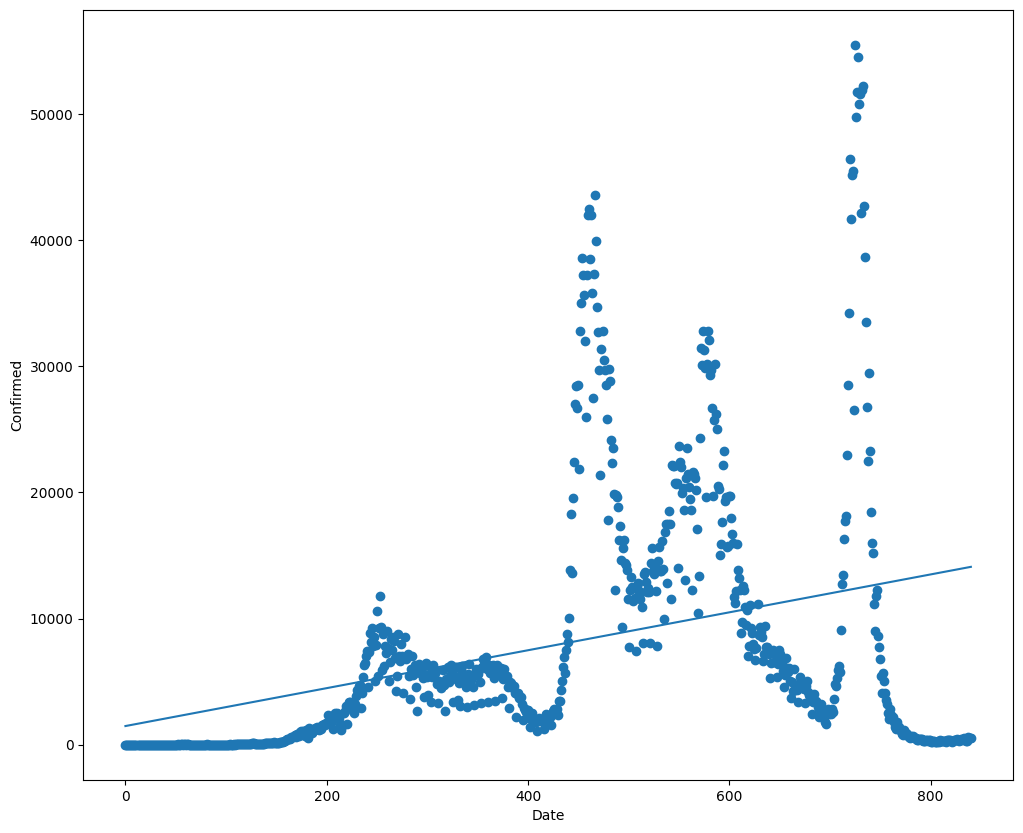

In [920]:
#Plot linear model
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]
ax = plot_scatter(x, y, "Date", "Confirmed")
ax.plot(x, model_y)

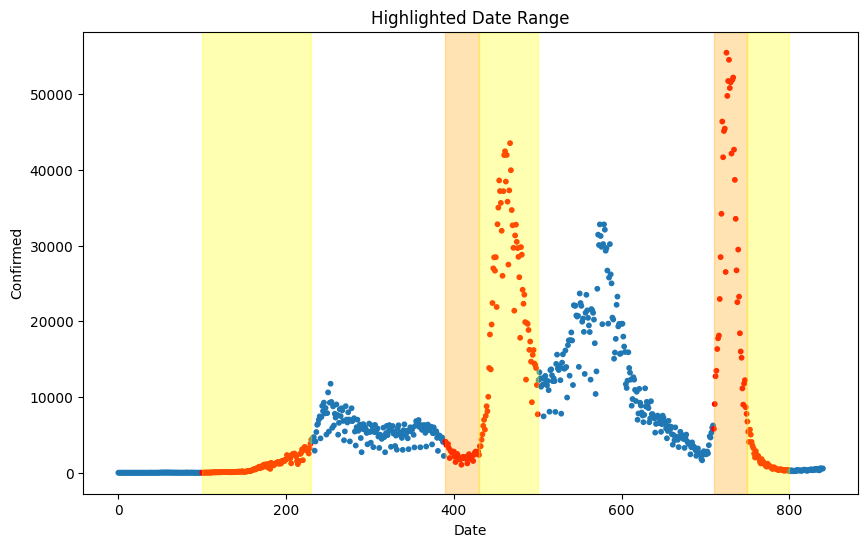

In [921]:
# Assuming your number of data points is n
n = len(x)

# Create a color array with the same length as the number of data points
colors = ['red' if 100 <= date <= 230 or 390 <= date <= 500 or 710 <= date <= 800 else 'tab:blue' for date in x]

# Create vertical regions and highlight them within specified date ranges, with the color set to gray
plt.figure(figsize=(10, 6))

# Plot the data points, selectively specifying colors based on conditions
plt.scatter(x, y, color=colors, s=10, alpha=1)

# Create vertical spans in specified date ranges and set the color to yellow
plt.axvspan(100, 230, color='yellow', alpha=0.3)
plt.axvspan(390, 430, color='orange', alpha=0.3)
plt.axvspan(430, 500, color='yellow', alpha=0.3)
plt.axvspan(710, 750, color='orange', alpha=0.3)
plt.axvspan(750, 800, color='yellow', alpha=0.3)

# Set other properties of the graph (such as title, axis labels, etc.)
plt.title('Highlighted Date Range')
plt.xlabel('Date')
plt.ylabel('Confirmed')

# Display the graph
plt.show()


In [922]:

def polymodel(num1,num2,num_degrees):
 x_filtered = x[(x >= num1) & (x <= num2)]
 y_filtered = y[(x >= num1) & (x <= num2)]
 #Fit model
 poly_model = np.polyfit(x_filtered, y_filtered, num_degrees)
 poly_model = np.poly1d(poly_model)
 #Get r2 score
 r2 = r2_score(y_filtered, poly_model(x_filtered))
 #Plot
 model_x = np.arange(num1,num2)
 model_y = poly_model(model_x)
 ax = plot_scatter(x_filtered, y_filtered, "Date", "Confirmed")
 ax.plot(model_x, model_y, "rx")
 return ax.plot(model_x, model_y, "rx"),print(poly_model),print("\n"),print("r2 =", r2)

 
24.22 x - 3068


r2 = 0.8023569685475622
        2
0.2782 x - 67.59 x + 4109


r2 = 0.9234263278822912


([<matplotlib.lines.Line2D at 0x2967d90a0>], None, None, None)

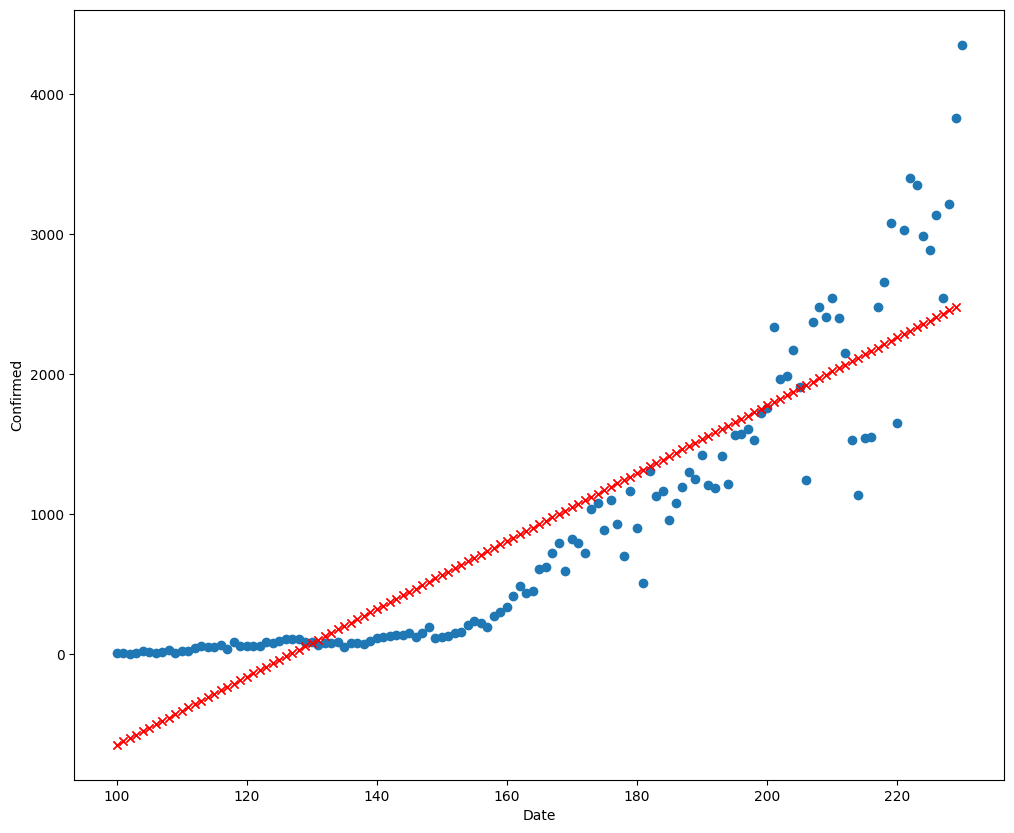

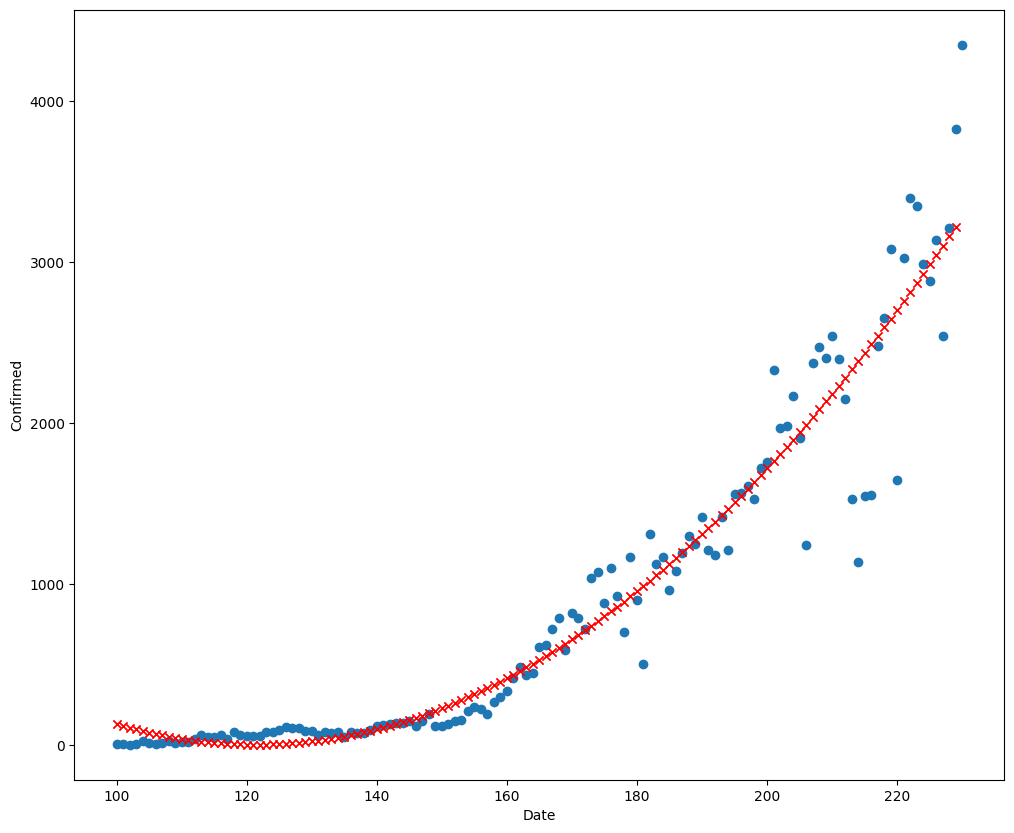

In [923]:
polymodel(100,230,1)
polymodel(100,230,2)

       2
7.042 x - 5786 x + 1.19e+06


r2 = 0.8620400572398565


([<matplotlib.lines.Line2D at 0x297d18730>], None, None, None)

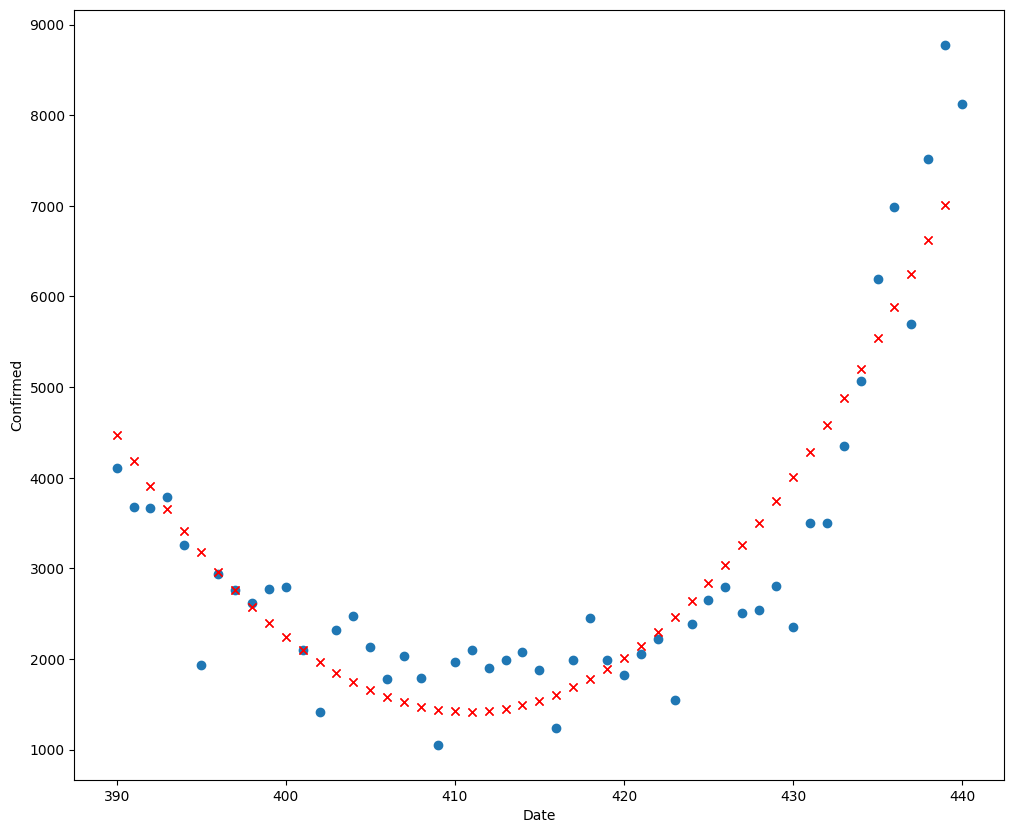

In [924]:
polymodel(390,440,2)

        2
-27.01 x + 2.52e+04 x - 5.844e+06


r2 = 0.8090361169062847


([<matplotlib.lines.Line2D at 0x2985ba1f0>], None, None, None)

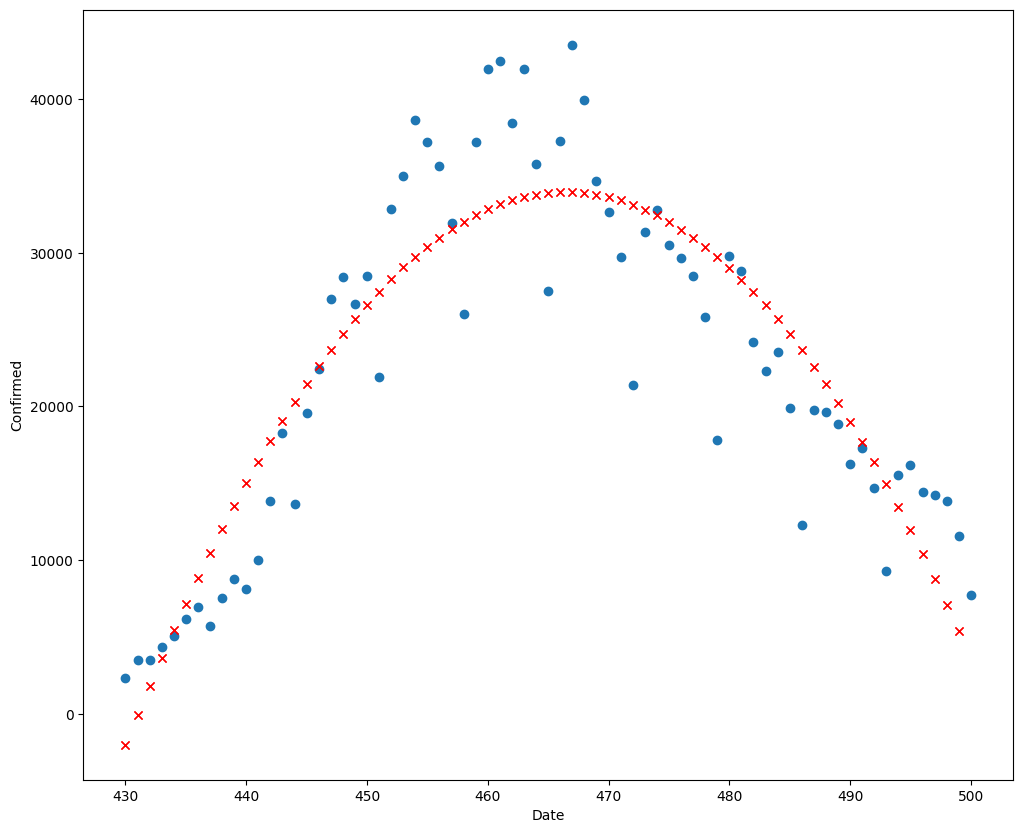

In [925]:
polymodel(430,500,2)

        2
-114.1 x + 1.664e+05 x - 6.059e+07


r2 = 0.8032642935962151


([<matplotlib.lines.Line2D at 0x2993cda30>], None, None, None)

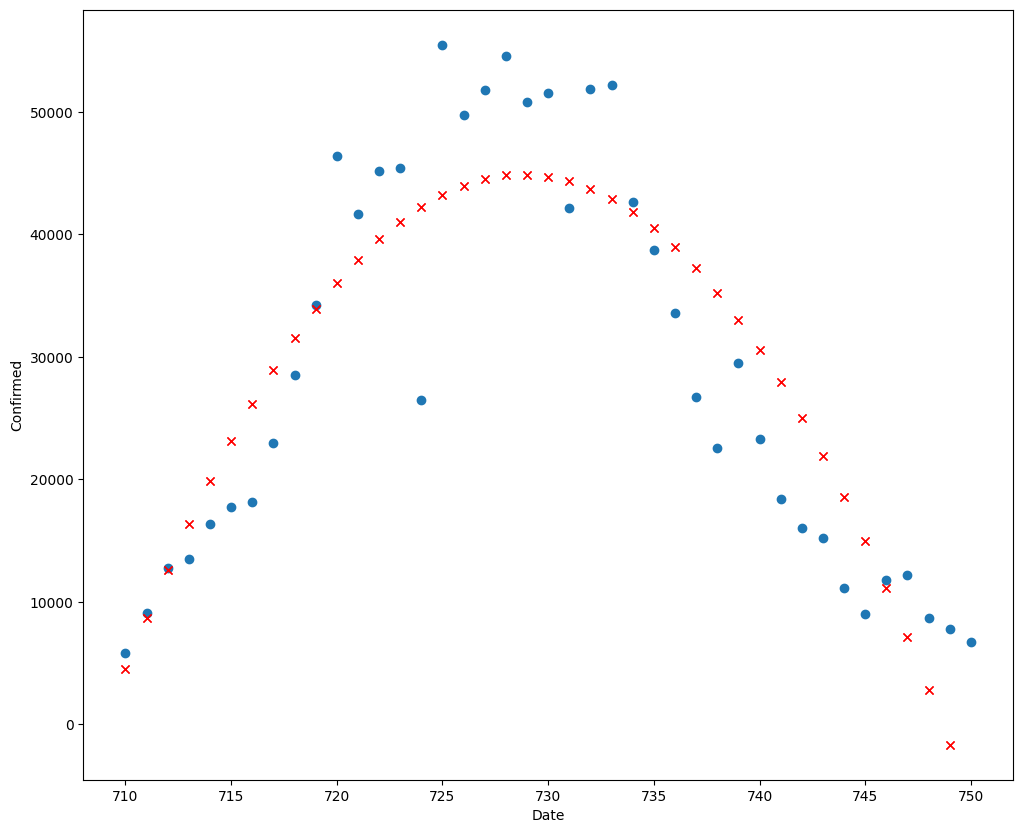

In [926]:
polymodel(710,750,2)

       2
3.679 x - 5793 x + 2.281e+06


r2 = 0.9226806263180704


([<matplotlib.lines.Line2D at 0x29a16a9a0>], None, None, None)

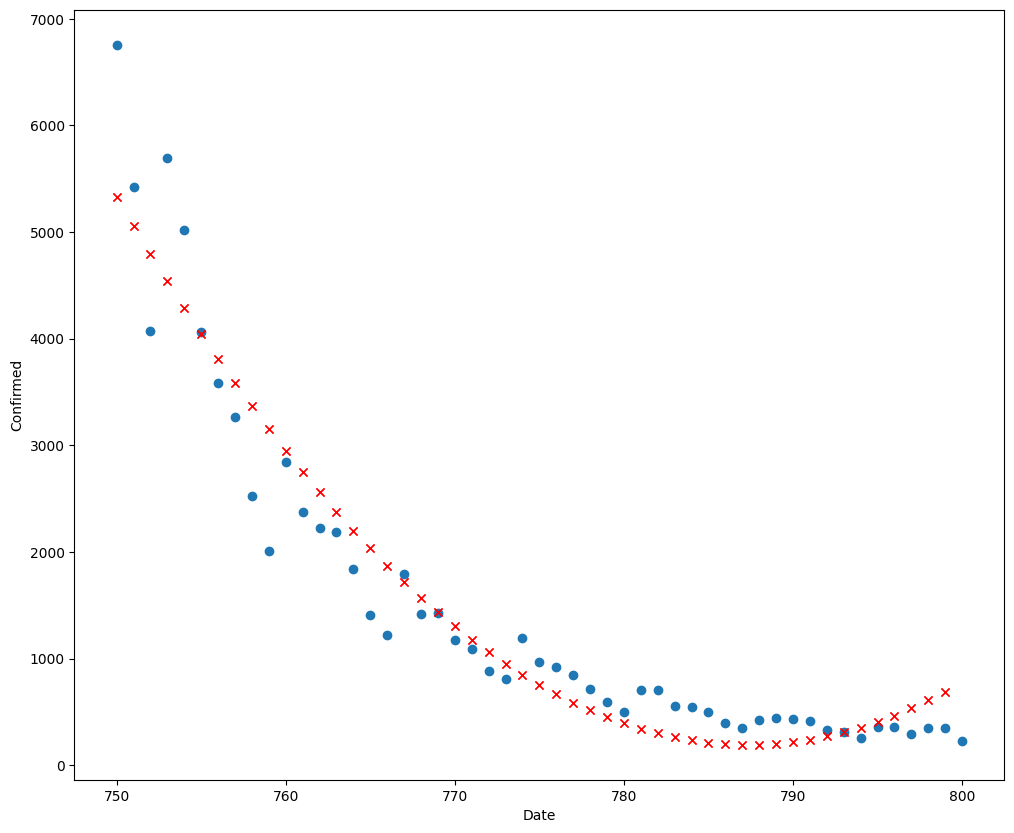

In [927]:
polymodel(750,800,2)

        2
0.1459 x - 34.26 x + 1853


r2 = 0.5306753262266506


([<matplotlib.lines.Line2D at 0x29851e3d0>], None, None, None)

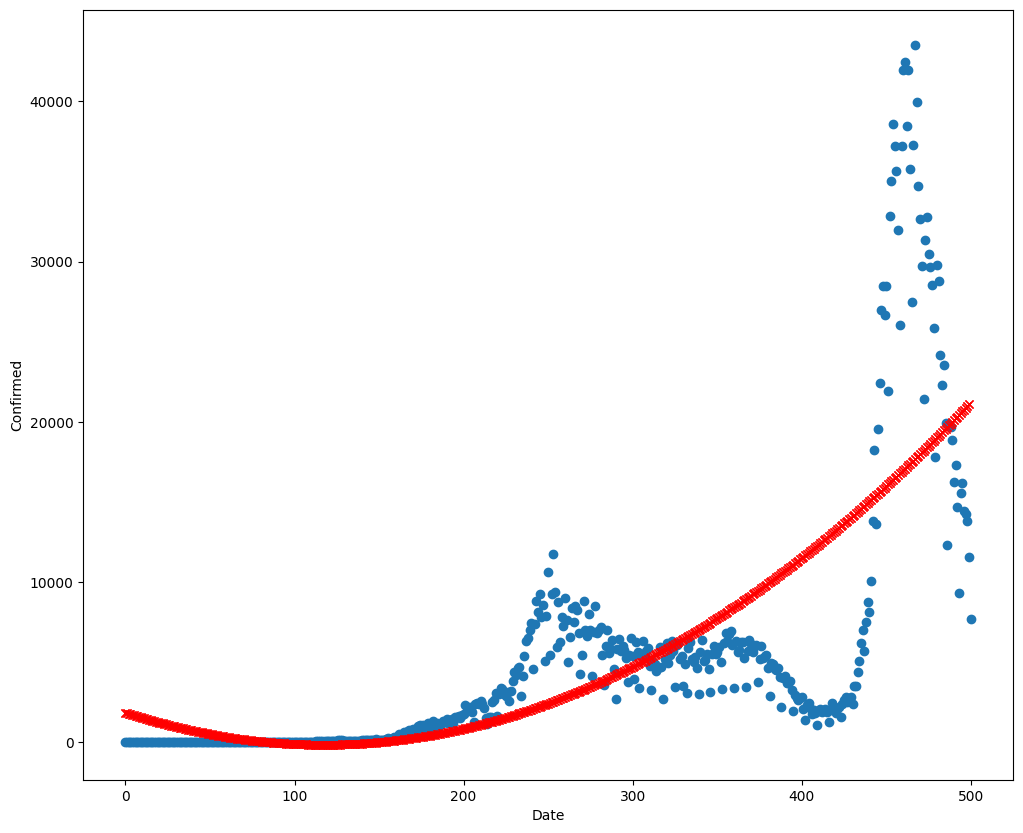

In [928]:
polymodel(0,500,2)